In [8]:
! pip install tensorflow --user
! pip install keras --user

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [10]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [11]:
X_train,y_train=train['features'],train['labels']
X_valid,y_valid=valid['features'],valid['labels']
X_test,y_test=test['features'],test['labels']

In [12]:
X_train.shape

(34799, 32, 32, 3)

In [13]:
y_train.shape

(34799,)

In [14]:
data = pd.read_csv('traffic-signs-data/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

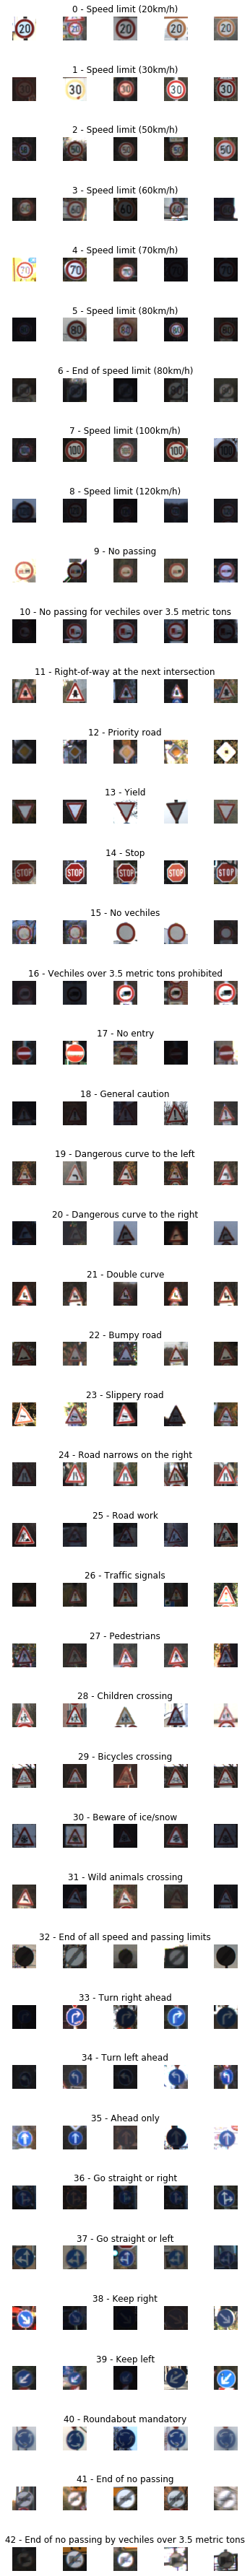

In [15]:
num_of_samples=[]
 
cols = 5  
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


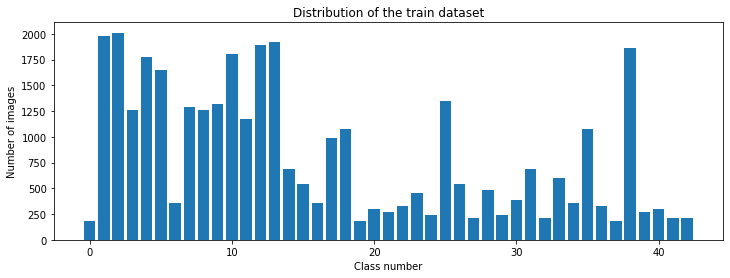

In [16]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

28

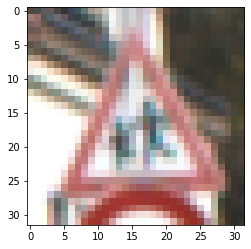

In [17]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

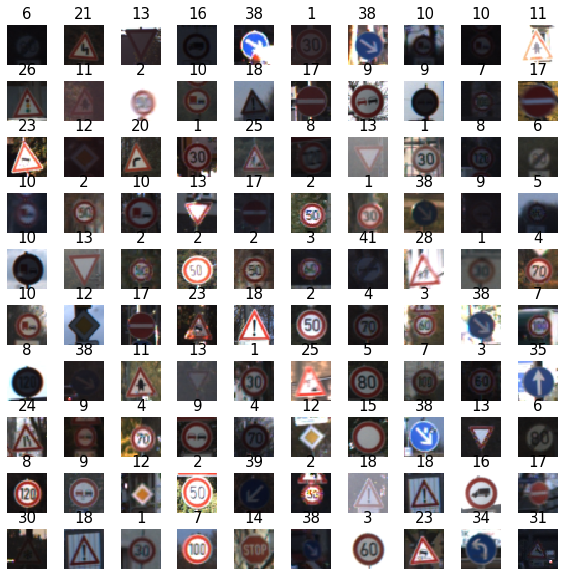

In [18]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):

    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

        

In [19]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [20]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims = True)

In [21]:
X_train_gray.shape

(34799, 32, 32, 1)

In [22]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128

In [23]:
X_train_gray_norm

array([[[[-0.8828125 ],
         [-0.89322917],
         [-0.89322917],
         ...,
         [-0.86458333],
         [-0.86979167],
         [-0.8828125 ]],

        [[-0.87239583],
         [-0.88541667],
         [-0.890625  ],
         ...,
         [-0.85677083],
         [-0.86458333],
         [-0.87760417]],

        [[-0.8671875 ],
         [-0.87760417],
         [-0.890625  ],
         ...,
         [-0.86197917],
         [-0.8671875 ],
         [-0.87760417]],

        ...,

        [[-0.88541667],
         [-0.88020833],
         [-0.875     ],
         ...,
         [-0.8984375 ],
         [-0.890625  ],
         [-0.89583333]],

        [[-0.88541667],
         [-0.875     ],
         [-0.8828125 ],
         ...,
         [-0.8984375 ],
         [-0.8984375 ],
         [-0.90104167]],

        [[-0.875     ],
         [-0.87760417],
         [-0.88020833],
         ...,
         [-0.88802083],
         [-0.89583333],
         [-0.90104167]]],


       [[[-0.6640625 ],


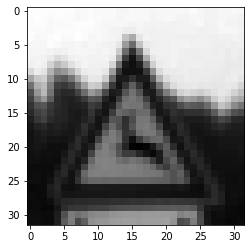

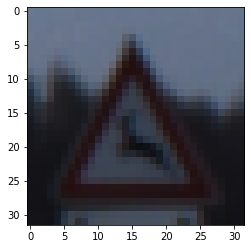

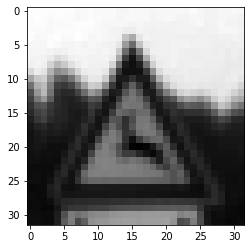

In [24]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [25]:
import sys
import cv2 as cv
def main(argv):
    # [variables]
    # Declare the variables we are going to use
    ddepth = cv.CV_16S
    kernel_size = 3
    window_name = "Laplace Demo"
    # [variables]
    # [load]
    src = cv.imread('classes.jpg') # Load an image
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image')
        print ('Program Arguments: [image_name -- default lena.jpg]')
        return -1
    # [load]
    # [reduce_noise]
    # Remove noise by blurring with a Gaussian filter
    src = cv.GaussianBlur(src, (3, 3), 0)
    # [reduce_noise]
    # [convert_to_gray]
    # Convert the image to grayscale
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    # [convert_to_gray]
    # Create Window
    cv.namedWindow(window_name, cv.WINDOW_AUTOSIZE)
    # [laplacian]
    # Apply Laplace function
    dst = cv.Laplacian(src_gray, ddepth, ksize=kernel_size)
    # [laplacian]
    # [convert]
    # converting back to uint8
    abs_dst = cv.convertScaleAbs(dst)
    # [convert]
    # [display]
    cv.imshow(window_name, abs_dst)
    cv.waitKey(0)
    # [display]
    return 0
if __name__ == "__main__":
    main(sys.argv[1:])

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers, models

model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(16, (5, 5), activation='relu',input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(84,activation='relu'))
model.add(layers.Dense(43,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [27]:
model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train_gray_norm,
                 y_train,
                 batch_size=500,
                 epochs=50,
                 verbose = 1,
                 validation_data =(X_valid_gray_norm,y_valid))

Epoch 1/50
70/70 [==============================] - 13s 192ms/step - loss: 3.1645 - accuracy: 0.1812 - val_loss: 2.5878 - val_accuracy: 0.3746
Epoch 2/50
70/70 [==============================] - 13s 187ms/step - loss: 1.6663 - accuracy: 0.5389 - val_loss: 1.3218 - val_accuracy: 0.6356
Epoch 3/50
70/70 [==============================] - 13s 185ms/step - loss: 0.9504 - accuracy: 0.7269 - val_loss: 0.9059 - val_accuracy: 0.7626
Epoch 4/50
70/70 [==============================] - 13s 185ms/step - loss: 0.6804 - accuracy: 0.8107 - val_loss: 0.7269 - val_accuracy: 0.8039
Epoch 5/50
70/70 [==============================] - 13s 184ms/step - loss: 0.5380 - accuracy: 0.8525 - val_loss: 0.6617 - val_accuracy: 0.8388
Epoch 6/50
70/70 [==============================] - 13s 186ms/step - loss: 0.4485 - accuracy: 0.8747 - val_loss: 0.5764 - val_accuracy: 0.8512
Epoch 7/50
70/70 [==============================] - 13s 185ms/step - loss: 0.3810 - accuracy: 0.8945 - val_loss: 0.5432 - val_accuracy: 0.8778

In [29]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))
print('Test score:', score[0])

395/395 [==============================] - 4s 9ms/step - loss: 0.6540 - accuracy: 0.9150
Test Accuracy: 0.9149643778800964
Test score: 0.6540104746818542


In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

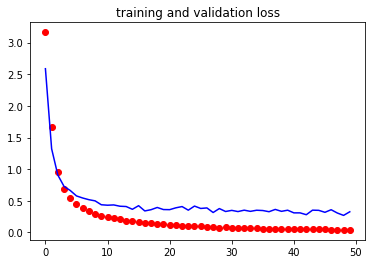

In [32]:
epochs = range(len(accuracy))
plt.plot(epochs , loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('training and validation loss')

Text(0.5, 1.0, 'training and validation accuracy')

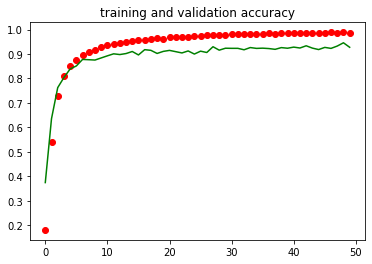

In [33]:
epochs = range(len(accuracy))
plt.plot(epochs , accuracy,'ro',label='Training accuracy')
plt.plot(epochs,val_accuracy,'g',label='Validation accuracy')
plt.title('training and validation accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


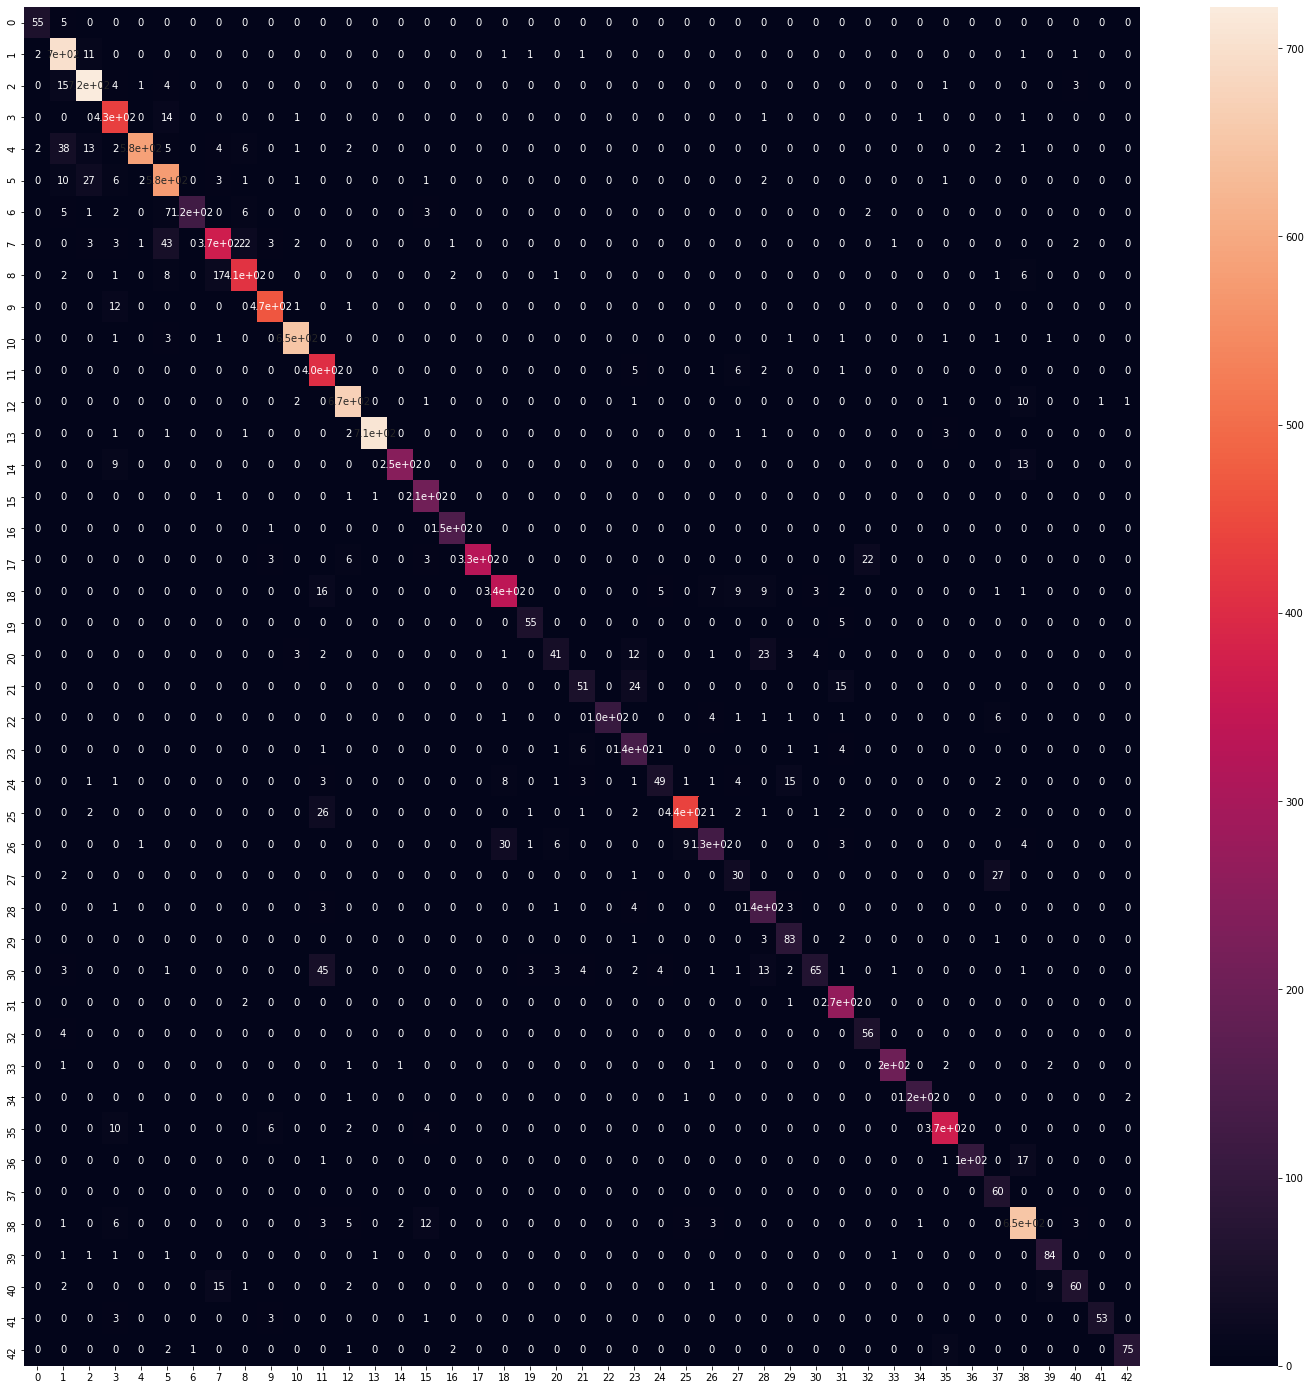

In [34]:
predicted_classes = model.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

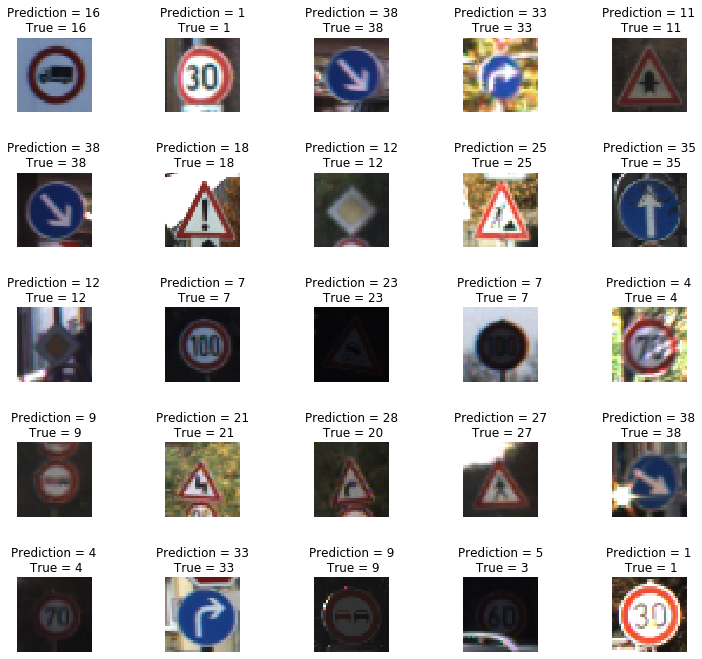

In [35]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [36]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

(32, 32)


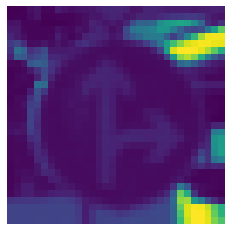

In [39]:
import cv2
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


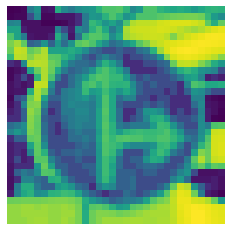

In [40]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)


In [41]:
import cv2
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
  

(32, 32)
predicted sign: [2]


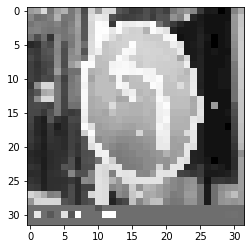

In [42]:

#predict internet number
import cv2
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
 
print("predicted sign: "+ str(model.predict_classes(img)))

(32, 32)
predicted sign: [1]


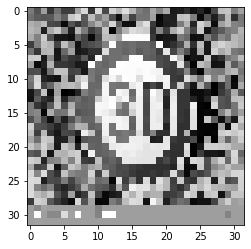

In [43]:

#predict internet number
import requests
import cv2
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
 
print("predicted sign: "+ str(model.predict_classes(img)))

(32, 32)
predicted sign: [23]


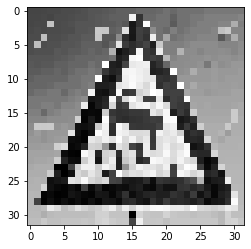

In [44]:

#predict internet number
import cv2
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.imshow(img)

 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
 
print("predicted sign: "+ str(model.predict_classes(img)))

(32, 32)
predicted sign: [13]


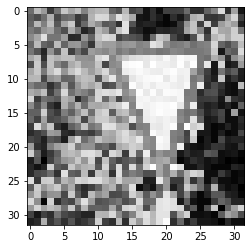

In [45]:

#predict internet number
import cv2
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
 
print("predicted sign: "+ str(model.predict_classes(img)))

(32, 32)
predicted sign: [31]


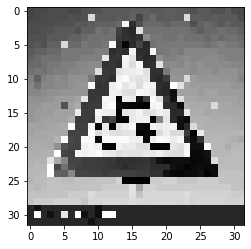

In [46]:
#predict internet number
import cv2
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
 
print("predicted sign: "+ str(model.predict_classes(img)))